<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn Twitter Data scraping & analysis**

# 1- Scraping Data

## **1-1- Accessing web APIs**
<br>

**Background:**


*Application Program Interfaces (APIs) are sets of protocols that govern interactions between sites and users.*

APIs are similar to web browsers but Web APIs manage and organize data.

For public APIs, many sites only allow authorized users:
*Twitter, Facebook, Instagram, Github, etc.*

<br>



**Twitter APIs:**

To connect to Twitter's APIs, users need a consumer key and consumer secret, which you can get by creating a Twitter app.



Creating a Twitter App
1. Log in to your [Twitter.com](https://) account
2. Go to [apps.twitter.com](https://)
3. Select: Create New App

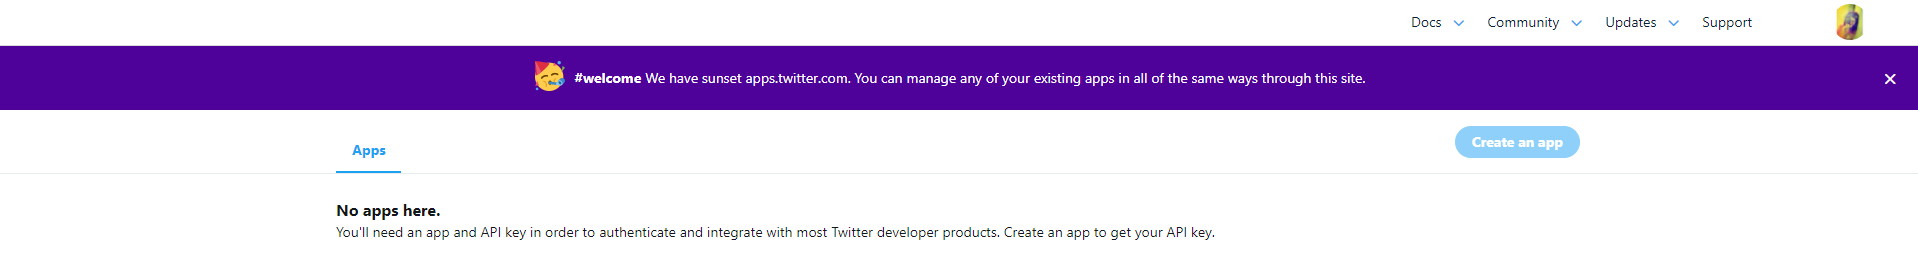

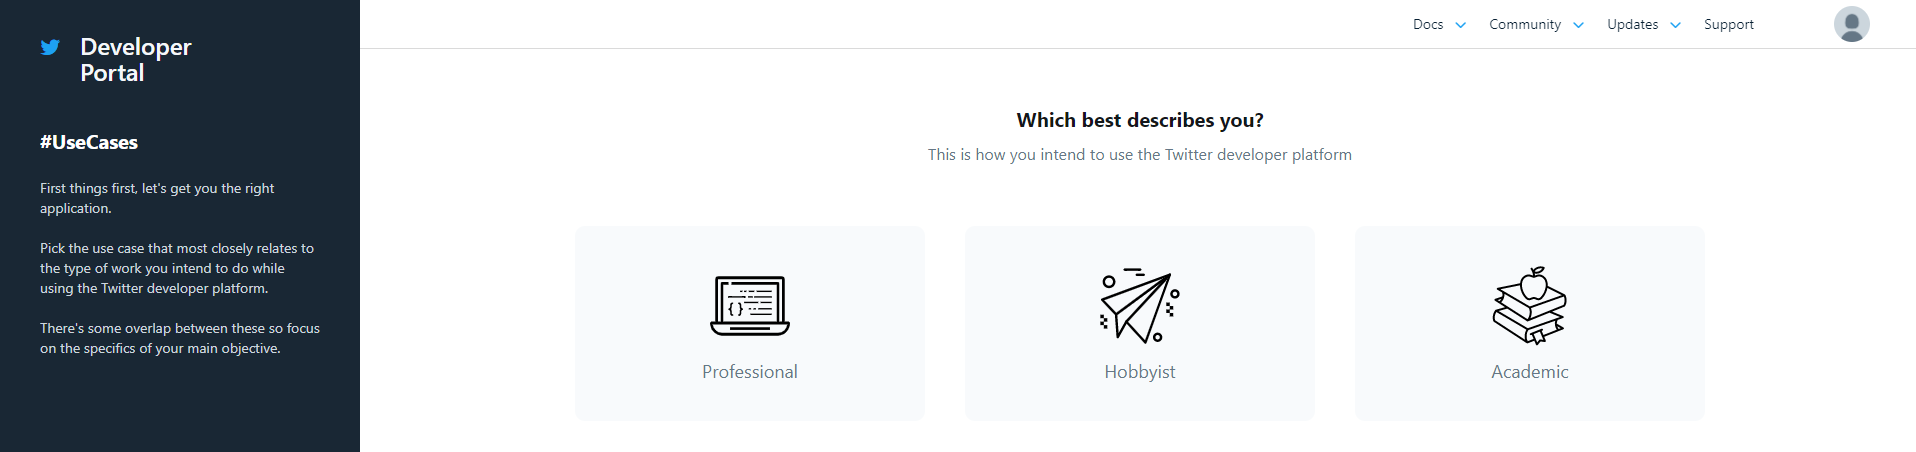

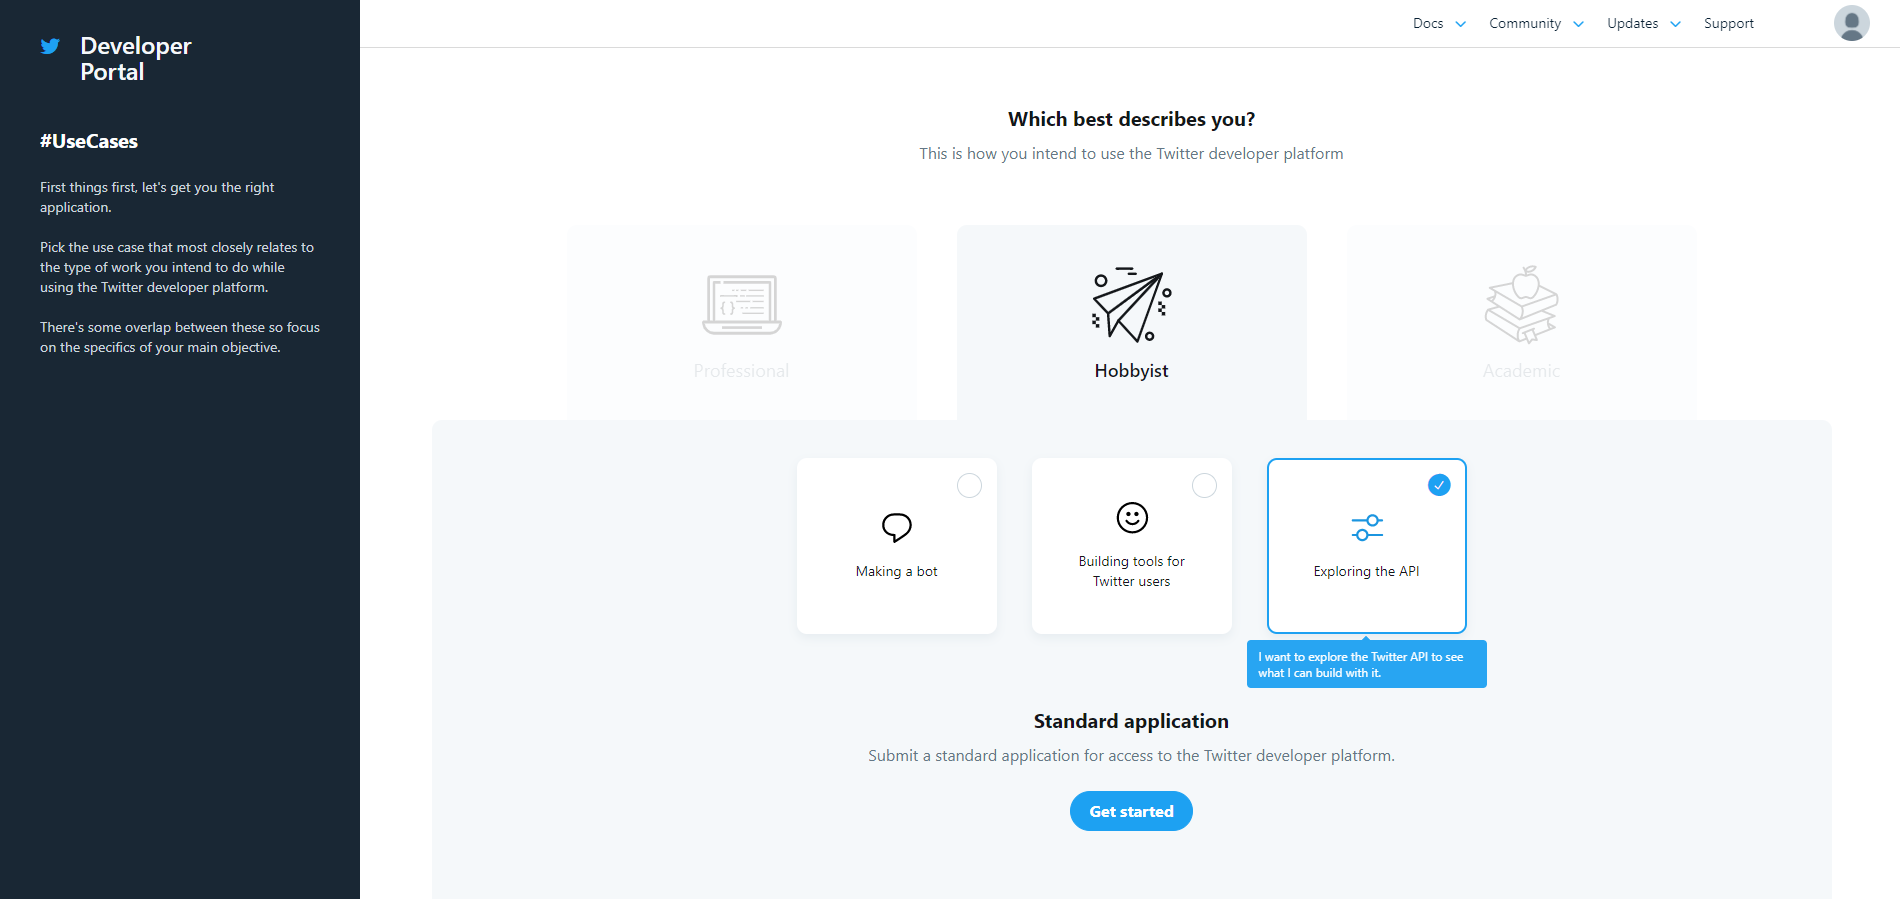

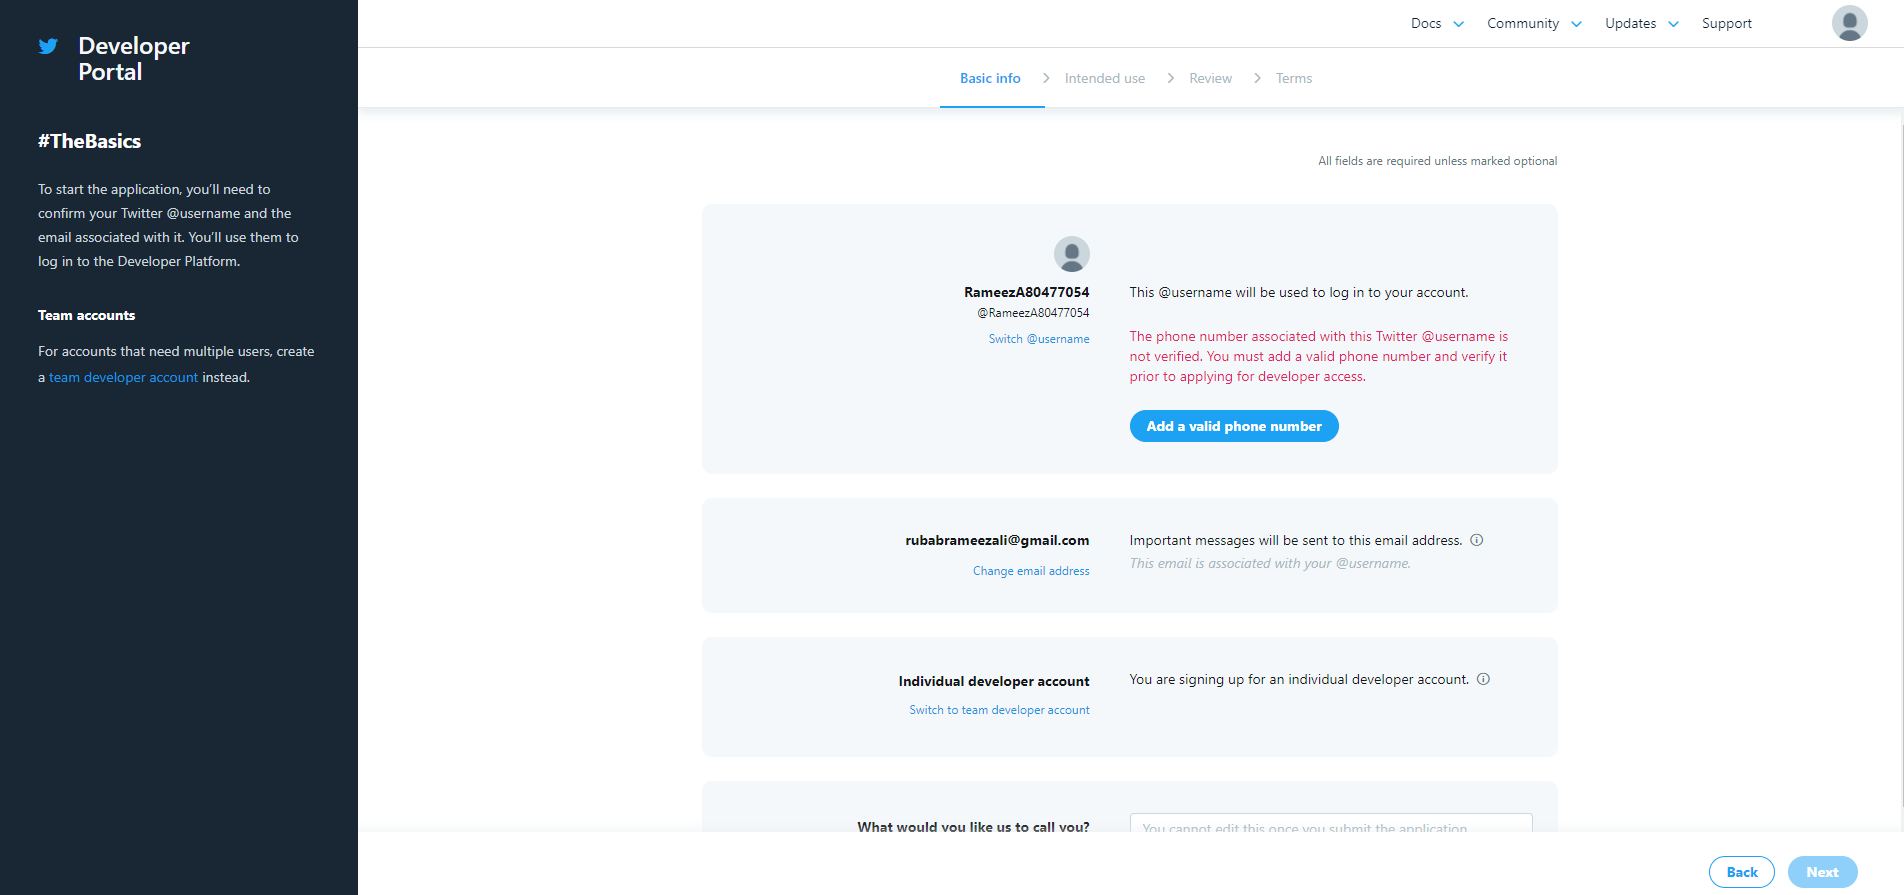

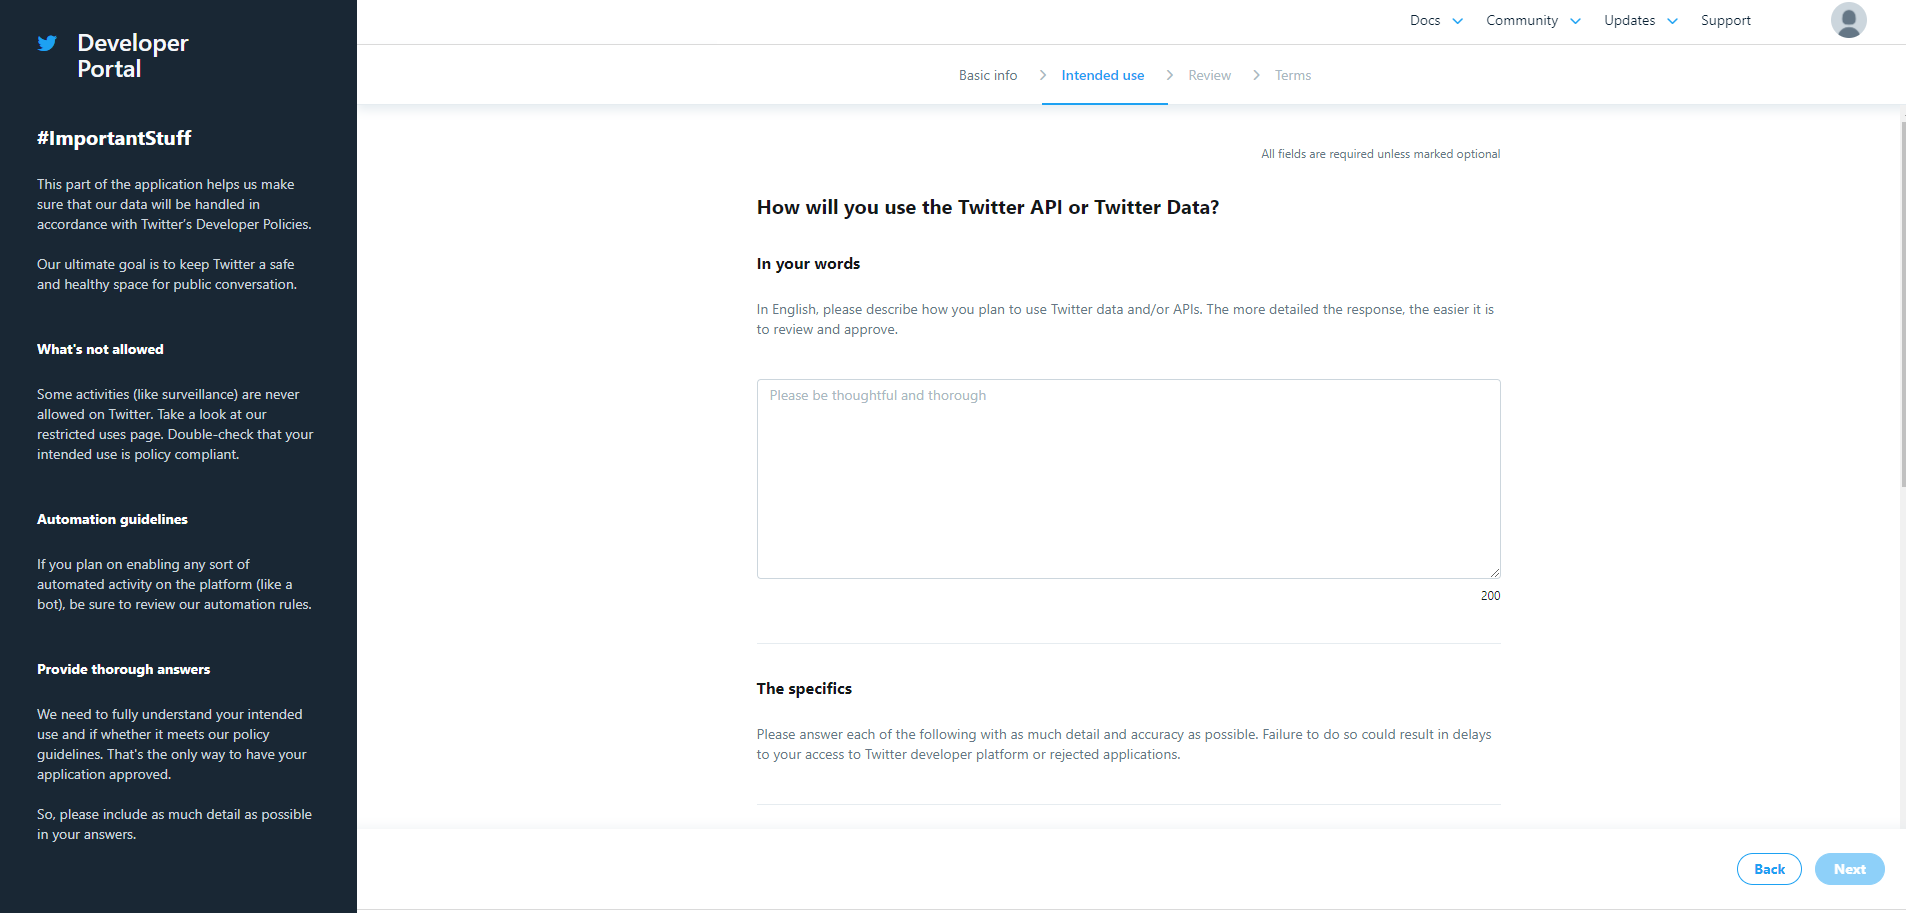

Complete the fields (important: Callback URL must be exact)


*   Name: twitter_app
*   Description: something about analyzing Twitter data
*   Website: https://twitter.com/{{you_screen_name}}
*   Callback URL: http://127.0.0.1:1410

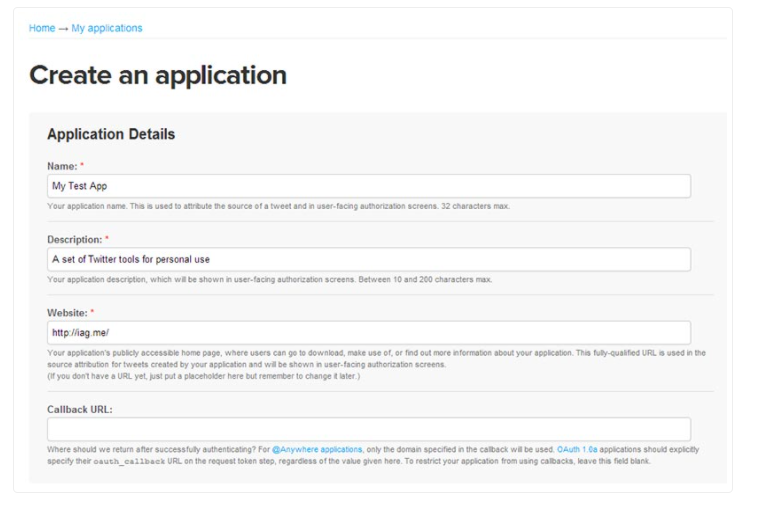

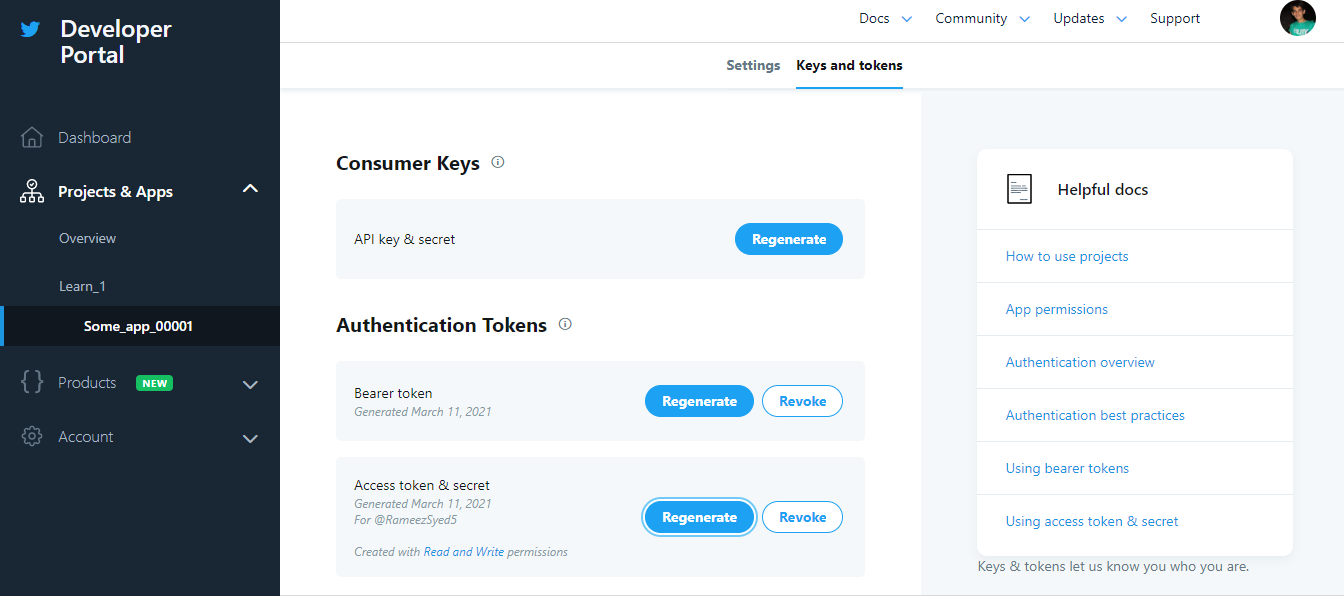

Copy the keys

*   Click Create your Twitter application
*   Select Keys and Access Tokens tab
*   Copy the Consumer Key (API Key) and Consumer Secret (API Secret) and paste into python script

In [ ]:
consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'


In [ ]:
# importing libraries:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# connecting to twitter API and Creating API object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## **1-2- Extracting tweets and Exploring Dataset**
*   Read in the tweets data using pandas
*   Explore the data
*   Some ideas of things to look for:
  *   the dimensions of the data
  *   get DataFrame info
  *   get summary statistics
  *   get the value counts of categoric columns
  *   count missing values





In [ ]:
# Define Supporting fucntions to extract url and hashtags from data:
def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']


def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']

# Define a fucntion to extract tweets from a twitter account timeline and save them in a Pandas Dataframe:
def tweet(user):
  print(f'retrieving tweets from {user}.... ')
  print('This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.')
  tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)

  
  users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]

  tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])

  print('retrieving tweets has been finished.')
  print(f'{len(tweet_text)} tweets has been retrieved.')
     
  return tweet_text




In [ ]:
# Extracting tweets from Waterloo Public Library twitter account:
df_waterloo = tweet("@WaterlooLibrary")
#df_kitchener = tweet("@KitchLibrary")


retrieving tweets from @WaterlooLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished.
3248 tweets has been retrieved.


In [ ]:
df_waterloo.shape


(3248, 11)

In [ ]:
# Extracting tweets from Kitchener Public Library twitter account:
df_kitchener = tweet("@KitchLibrary")

retrieving tweets from @KitchLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished.
3243 tweets has been retrieved.


In [ ]:
df_kitchener.shape

(3243, 11)

In [ ]:
# Combining (Concatenating) two dataframes
#df = [df_waterloo, df_kitchener]
#concatenate dataframes
df = pd.concat([df_waterloo, df_kitchener])
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

ID  ...        hashtags
0  31035514  ...            None
1  31035514  ...  RacialEquityWR
2  31035514  ...            None
3  31035514  ...            None
4  31035514  ...            None

[5 rows x 11 columns]



---


## Twitter API did not work? Do not worry! 
**Run the code below to create the tweets dataframe.**
you can skip this code if you successfully run all the code above.


---






In [436]:
df=pd.read_json('https://raw.githubusercontent.com/SepehrSepehri/DataForGoodWR/main/Tweets.json')
df.head()

ID  ... hashtags
0  31035514  ...     None
1  31035514  ...     None
2  31035514  ...     None
3  31035514  ...     None
4  31035514  ...     None

[5 rows x 11 columns]



---






In [437]:
df['text'][1]

'Stacey Abrams while work against voter suppression and voting found time to write a thriller. While Justice Sleeps… https://t.co/BqlZOaQQmp'

In [438]:
df.iloc[:,3][4]

'RT @uwaterlooHREI: Learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…'

In [439]:
df.iloc[:,9][4]

In [440]:
# number of rows and columns
df.shape

(6492, 11)

In [441]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6491
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6492 non-null   int64         
 1   created_at       6492 non-null   datetime64[ns]
 2   screen_name      6492 non-null   object        
 3   text             6492 non-null   object        
 4   location         6492 non-null   object        
 5   favorite_count   6492 non-null   int64         
 6   retweet_count    6492 non-null   int64         
 7   followers_count  6492 non-null   int64         
 8   friends_count    6492 non-null   int64         
 9   URL              4775 non-null   object        
 10  hashtags         846 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 928.6+ KB


In [442]:
df['location'].value_counts()

Waterloo, Ontario, Canada     3249
Kitchener, Ontario, Canada    3243
Name: location, dtype: int64

In [443]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                1717
hashtags           5646
dtype: int64

# 2- Cleaning text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html



*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.

















## 2-1- Removing meaningless characters

In [444]:
# importing libraries

import nltk
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [445]:
# before cleaning text, we want to calculate some characteristics of the text.
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

### Removing retweet indicator

In [446]:
# Removing retweet indicator such as  "RT @WaterlooLibrary":

#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# Removing retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text_clean']=  [remove_RT(tweet) for tweet in  df['text']]
#df['text']
df.loc[0:10]

ID  ...                                         text_clean
0   31035514  ...  As many of us are dreaming of travel in a heal...
1   31035514  ...  Stacey Abrams while work against voter suppres...
2   31035514  ...  Author @JenniferiRyan is popular. Her two prev...
3   31035514  ...   Happy International Women's Day ❤️\n\nThis is...
4   31035514  ...   Learn about strength &amp; healing through th...
5   31035514  ...  As our staycation lives continue we're sharing...
6   31035514  ...  Fairy tales are dark for a reason -- they're t...
7   31035514  ...  The Smart Way The Jack Reacher Novels Are Bein...
8   31035514  ...  🌸 April Break is fast approaching and we have ...
9   31035514  ...   There's still time to register for tomorrow's...
10  31035514  ...  "A year into the pandemic, readers know more t...

[11 rows x 16 columns]

In [447]:
# Removing all whitesapces from the beginning and the end of the tweets.
# Whitespaces are the characters related to new line, tab, and space.
df['text_clean'] = [m.strip() for m in df['text_clean']]
df.head()


ID  ...                                         text_clean
0  31035514  ...  As many of us are dreaming of travel in a heal...
1  31035514  ...  Stacey Abrams while work against voter suppres...
2  31035514  ...  Author @JenniferiRyan is popular. Her two prev...
3  31035514  ...  Happy International Women's Day ❤️\n\nThis is ...
4  31035514  ...  Learn about strength &amp; healing through the...

[5 rows x 16 columns]

In [448]:
df['text_clean'].iloc[1]

'Stacey Abrams while work against voter suppression and voting found time to write a thriller. While Justice Sleeps… https://t.co/BqlZOaQQmp'

###  Removing urls

In [449]:
# Defining a function for removing urls from the text
#def remove_url(txt):
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_url(text):
    return re.sub(r'https?://.*\b','',text)

df['text_clean']=df['text_clean'].apply(lambda x: remove_url(x))

In [450]:
df['text_clean'].iloc[1]

'Stacey Abrams while work against voter suppression and voting found time to write a thriller. While Justice Sleeps… '

###   Removing Emojis

In [451]:
# Removing emojis from the text
# The following function revomes the emojis from text. 'apply' function should be used for each text.
# Apply function: Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text_clean']=df['text_clean'].apply(lambda x: remove_emoji(x))

#Full list of emojies: https://unicode.org/emoji/charts/full-emoji-list.html

In [452]:
df['text'].iloc[3]

"RT @thenewquarterly: Happy International Women's Day ❤️\n\nThis is just a reminder that The X Page is accepting applications until March 25th…"

In [453]:
df['text_clean'].iloc[3]

"Happy International Women's Day \n\nThis is just a reminder that The X Page is accepting applications until March 25th…"

### Removing Punctuations
**string** is a pre-built module in python for workingwith strings

In [454]:
# We use the list of punctuations in the string module for removing the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [455]:
# Defining a supporting function for removing Punctuations
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text_clean']= [remove_punc(x) for x in df['text_clean']]


In [456]:
df['text'].iloc[0]

'As many of us are dreaming of travel in a healthy post-pandemic time, Rachel Rosenberg @bookriot shares her picks o… https://t.co/5jvwkWvP82'

In [457]:
df['text_clean'].iloc[0]

'As many of us are dreaming of travel in a healthy postpandemic time Rachel Rosenberg bookriot shares her picks o… '

## 2-2- Tokenization
After removing unnecessary characters from the text, we can tokenize it.

**Tokenization** is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [458]:
# Tokenizing by using nltk word tokenizer:
from nltk import word_tokenize


df['tokenized']=df['text_clean'].apply(word_tokenize)
# Removing whitspace before and after each tokens
df['tokenized']= df['tokenized'].apply(lambda x: [token.strip() for token in x])

# Removing stop words
# from nltk.corpus import stopwords
# stop = set(stopwords.words('english'))
# df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


ID  ...                                          tokenized
0  31035514  ...  [As, many, of, us, are, dreaming, of, travel, ...
1  31035514  ...  [Stacey, Abrams, while, work, against, voter, ...
2  31035514  ...  [Author, JenniferiRyan, is, popular, Her, two,...
3  31035514  ...  [Happy, International, Womens, Day, This, is, ...
4  31035514  ...  [Learn, about, strength, amp, healing, through...

[5 rows x 17 columns]

## 2-3- Lemmatization
**The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.**

***Stemming*** usually refers to a ***crude heuristic process*** that **chops off the ends of words** in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

***Lemmatization*** usually refers to doing things properly with the **use of a vocabulary and morphological analysis of words**, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

Example: 
token saw:
stemming:

*   --> s

lemmatization:
*   saw (noun) --> saw
*   saw (verb) --> see

Resource: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### Part of Speach (POS) tagging
part-of-speech tagging, takes a sequence of words and assignes each word a part of speech like NOUN or VERB

In [459]:
# Downloading and importing wordnet
# downloading wordet
nltk.download('wordnet')

# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

# importing wordnet from nltk.corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [460]:
# defining supporting functions to get the POS tags
def defualt_pos_tagger (token):
    tags=nltk.pos_tag(token)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

### WordNet

***WordNet®*** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
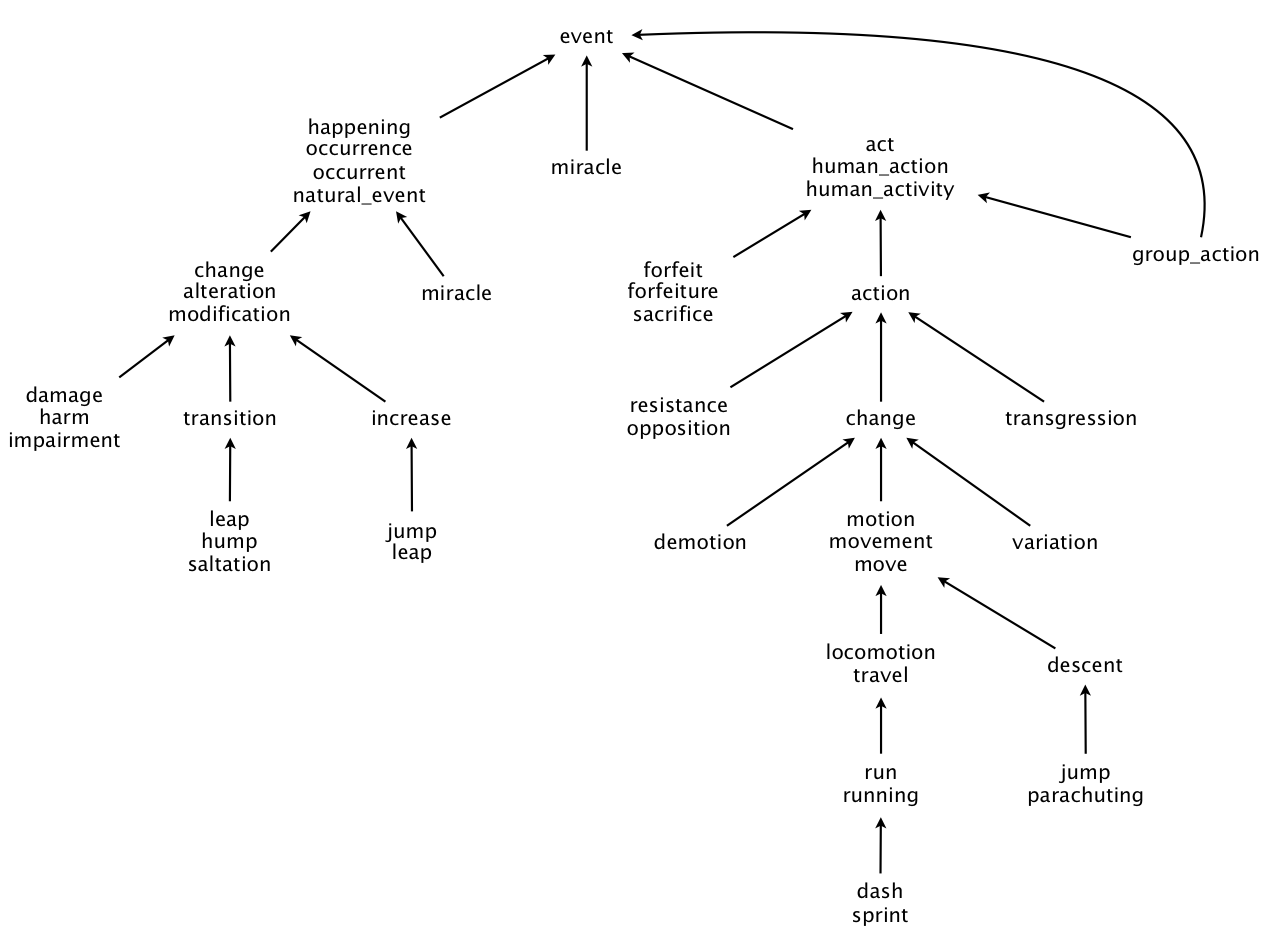
Resource: https://wordnet.princeton.edu/

In [461]:
# Defining supporting function for changing POS of NLTK to POS of Wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [462]:
# Extracting POS of tokens
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

ID  ...                                        wordnet_pos
0  31035514  ...  [(As, n), (many, a), (of, n), (us, n), (are, v...
1  31035514  ...  [(Stacey, n), (Abrams, n), (while, n), (work, ...
2  31035514  ...  [(Author, n), (JenniferiRyan, n), (is, v), (po...
3  31035514  ...  [(Happy, a), (International, n), (Womens, n), ...
4  31035514  ...  [(Learn, v), (about, n), (strength, n), (amp, ...

[5 rows x 19 columns]

In [463]:
df[['defualt_postag','wordnet_pos']]

defualt_postag                                        wordnet_pos
0     [(As, IN), (many, JJ), (of, IN), (us, PRP), (a...  [(As, n), (many, a), (of, n), (us, n), (are, v...
1     [(Stacey, NNP), (Abrams, NNP), (while, IN), (w...  [(Stacey, n), (Abrams, n), (while, n), (work, ...
2     [(Author, NNP), (JenniferiRyan, NNP), (is, VBZ...  [(Author, n), (JenniferiRyan, n), (is, v), (po...
3     [(Happy, JJ), (International, NNP), (Womens, N...  [(Happy, a), (International, n), (Womens, n), ...
4     [(Learn, VB), (about, IN), (strength, NN), (am...  [(Learn, v), (about, n), (strength, n), (amp, ...
...                                                 ...                                                ...
6487  [(Songs, NNS), (stories, NNS), (and, CC), (oth...  [(Songs, n), (stories, n), (and, n), (other, a...
6488  [(While, IN), (our, PRP$), (new, JJ), (expande...  [(While, n), (our, n), (new, a), (expanded, v)...
6489  [(Tick, NNP), (tock, VBZ), (The, DT), (Doomsda...  [(Tick, n), (tock, v), (The, n), (DoomsdayCloc...
6490  [(Keep, VB), (your, PRP$), (eye, NN), (on, IN)...  [(Keep, v), (your, n), (eye, n), (on, n), (Oli...
6491  [(DavidAlanGay, NNP), (Thats, VBZ), (a, DT), (...  [(DavidAlanGay, n), (Thats, v), (a, n), (great...

[6492 rows x 2 columns]

In [464]:
# lemmatizating tokens using WordNetLemmatizer:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
# convering each tweet from a list of token to a string. For some functions that will be used, this column can be used as an input in future. 
df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

ID  ...                                    lemmatized_text
0  31035514  ...  As many of u be dream of travel in a healthy p...
1  31035514  ...  Stacey Abrams while work against voter suppres...
2  31035514  ...  Author JenniferiRyan be popular Her two previo...
3  31035514  ...  Happy International Womens Day This be just a ...
4  31035514  ...  Learn about strength amp heal through the art ...

[5 rows x 21 columns]

In [465]:
print(df['text'].iloc[4])
print(df['text_clean'].iloc[4])
print(df['lemmatized_words'].iloc[4])
print(df['lemmatized_text'].iloc[4])

RT @uwaterlooHREI: Learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…
Learn about strength amp healing through the arts at this panel discussion and free screening of the acclaimed short docum…
['Learn', 'about', 'strength', 'amp', 'heal', 'through', 'the', 'art', 'at', 'this', 'panel', 'discussion', 'and', 'free', 'screening', 'of', 'the', 'acclaimed', 'short', 'docum…']
Learn about strength amp heal through the art at this panel discussion and free screening of the acclaimed short docum…


In [466]:
df['lemmatized_words']

0       [As, many, of, u, be, dream, of, travel, in, a...
1       [Stacey, Abrams, while, work, against, voter, ...
2       [Author, JenniferiRyan, be, popular, Her, two,...
3       [Happy, International, Womens, Day, This, be, ...
4       [Learn, about, strength, amp, heal, through, t...
                              ...                        
6487    [Songs, story, and, other, activity, Join, u, ...
6488    [While, our, new, expand, HeffnerStudio, be, u...
6489    [Tick, tock, The, DoomsdayClock, be, hold, ste...
6490        [Keep, your, eye, on, Olivia, and, her, work]
6491    [DavidAlanGay, Thats, a, great, question, eCon...
Name: lemmatized_words, Length: 6492, dtype: object

In [467]:
# Changing characters to the lowercase
#df['lemmatized_words']=df['lemmatized_words'].str.lower()

df['lemmatized_words']= df['lemmatized_words'].apply(lambda x: [token.lower() for token in x])
df['lemmatized_text']=df['lemmatized_text'].str.lower()



---




# 3- Exploratory Data Analysis (EDA):

---


### 3-1 Hashtags Frequency


In [469]:
df.head()

ID  ...                                    lemmatized_text
0  31035514  ...  as many of u be dream of travel in a healthy p...
1  31035514  ...  stacey abrams while work against voter suppres...
2  31035514  ...  author jenniferiryan be popular her two previo...
3  31035514  ...  happy international womens day this be just a ...
4  31035514  ...  learn about strength amp heal through the art ...

[5 rows x 21 columns]

In [470]:
# Finding most frequent hashtgags
# value_counts function return a Series containing counts of unique values.
df['hashtags'].value_counts()

85Queen                      41
STMY                         37
kwawesome                    31
bookadventcalendar           16
ThrowbackThursday            10
                             ..
paperbagprincess              1
1eReadLivrelCanada            1
NationalVolunteerWeek2020     1
literarycats                  1
sillysaturday                 1
Name: hashtags, Length: 477, dtype: int64

In [471]:
# The most frequent hashtags:
hashtags_freq=df['hashtags'].value_counts()[:20]
hashtags_freq

85Queen               41
STMY                  37
kwawesome             31
bookadventcalendar    16
ThrowbackThursday     10
RemembranceDay         9
belongtogetherWR       9
KWAwesome              9
FamilyLiteracyKW       8
HarryPotter            8
librarylove            8
Pride                  8
booklovers             8
85Green                7
BlackHistoryMonth      6
MadeInHeffner          6
BellLetsTalk           6
BigLibraryRead         6
IWD2019                6
WRAwesome              5
Name: hashtags, dtype: int64

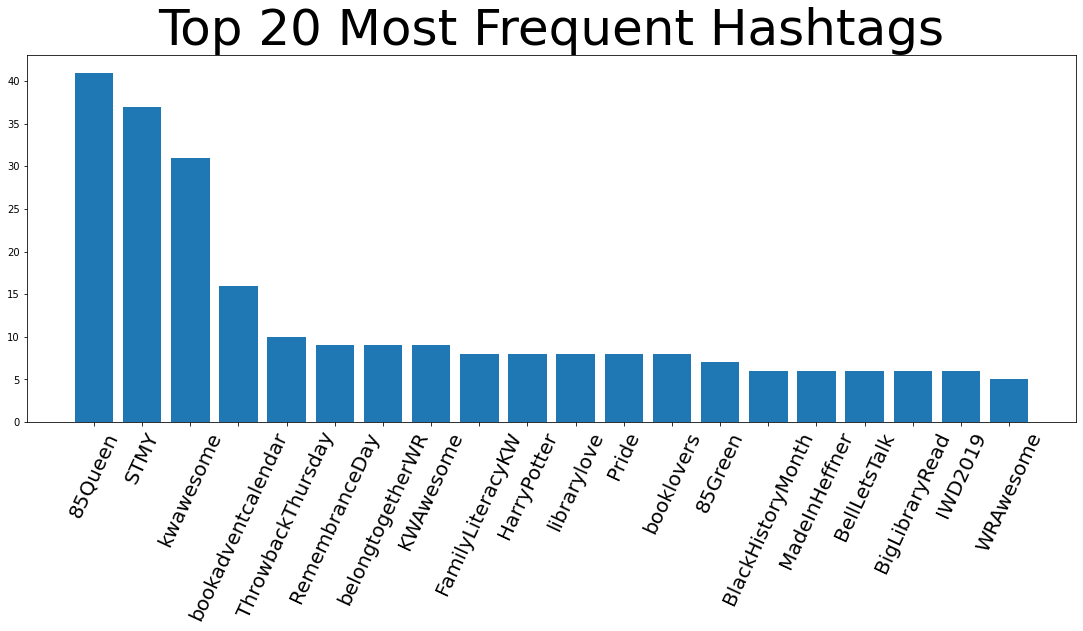

In [472]:
# Plot a bar chart showing top most frequent Hashtags
number_hashtags=20
fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


In [473]:
# The function returns results in the descending order for values.
# The order can be changed by setting ascending parameters to True
df['hashtags'].value_counts(ascending=True)

sillysaturday                 1
literarycats                  1
NationalVolunteerWeek2020     1
1eReadLivrelCanada            1
paperbagprincess              1
                             ..
ThrowbackThursday            10
bookadventcalendar           16
kwawesome                    31
STMY                         37
85Queen                      41
Name: hashtags, Length: 477, dtype: int64

### 3-2- Retweeted tweets Frequency
"retweet_count" is the column that shows the number of likes for each tweet

In [474]:
# sort_values orders the dataset in terms of a give column.
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

ID  ...                                    lemmatized_text
235    31035514  ...  today every view of this video help create pos...
6154  425118862  ...             you come at the king you best not miss
3226   31035514  ...  “ well i be tell you there be hope i have see ...
1937   31035514  ...  on our street we accept all we love all and we...
6084  425118862  ...  if you be or be the friendly gent blue coat wh...

[5 rows x 21 columns]

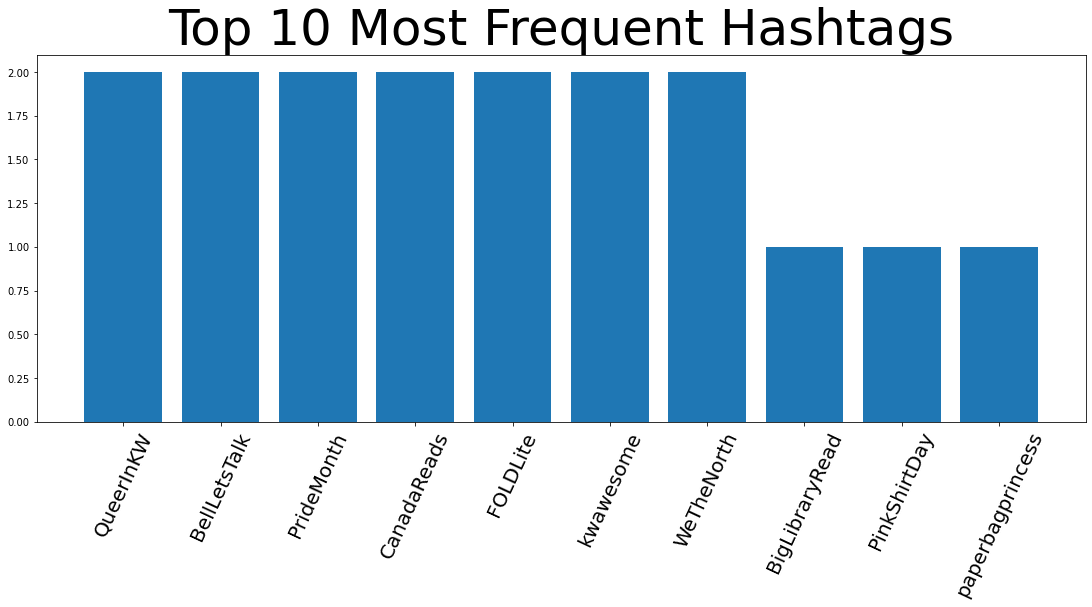

In [475]:
# Ploting a bar chart shows the top most frequent hashtags for top retweeted tweets.
hastags_most_liked=df.sort_values('retweet_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


#### **Practice time:**
Find the 100 most liked tweets? The dataframe should show the text and the number of likes for each tweets.

In [476]:
# solution:


#### Practice time:
Write a code to extract 10 most frequent hashtags from 200 most liked tweets and use bar chart to show them? 

In [477]:
# Solution:



### 3-3- Tweet likes Frequency
"favorite_count" is the column that shows the number of likes for each tweet

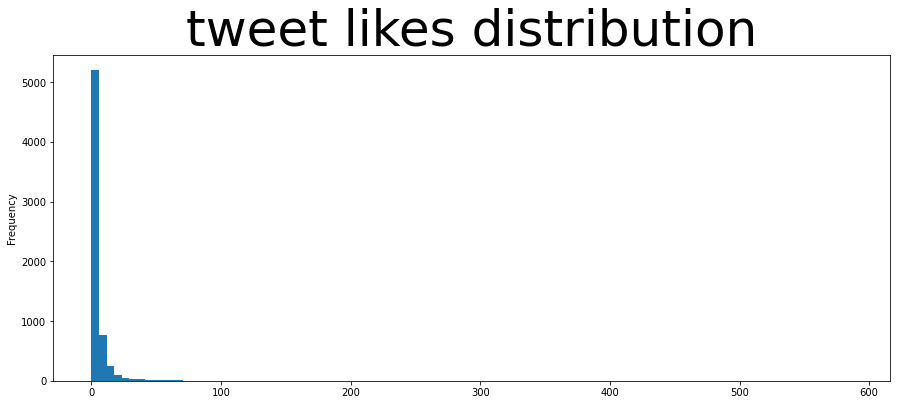

In [478]:
# Plot a hsitogram showing the distribution of tweets likes
# Histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. 
# Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data. (Resource: Khanacademy.org)

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=50)
df['favorite_count'].plot.hist(bins=100)

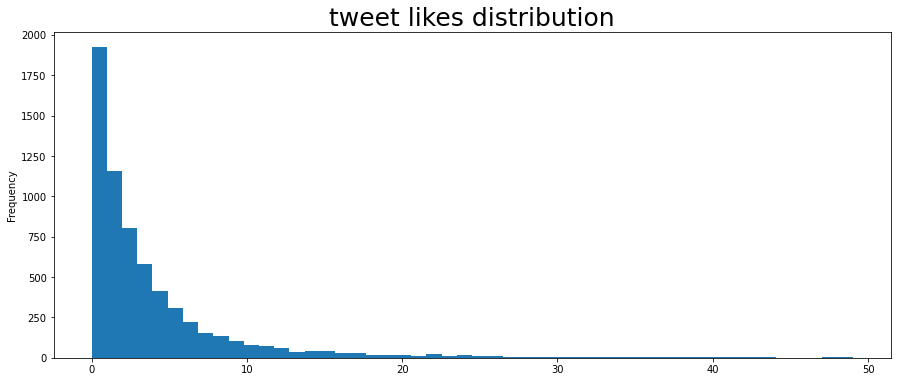

In [479]:
# Removing outliers and ploting a hsitogram showing the distribution of tweets likes 
# To get a better understanding of likes distribution, likes more that 50 are revmoved.

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=25, )
df[df['favorite_count']<50]['favorite_count'].plot.hist(bins=50)

### 3-4- Number of Hashtags in a tweet vs the Number of likes it got

In [480]:
# Group by a column
df.groupby('hashtags')

In [481]:
# aggregate values for a group by
df.groupby('hashtags').aggregate({'favorite_count': np.sum})

favorite_count
hashtags                                    
1eReadLivrelCanada                         0
2009v2019                                131
2021Census                                 0
365ofgoodWR                                0
3Dprint                                    0
...                                      ...
wrdsbesl                                   0
writers                                    1
youngreadersarefutureleaders               2
ywkw                                       0
zoo                                        0

[477 rows x 1 columns]

In [482]:
# Sorting a group by dataframe
df.groupby('hashtags').aggregate({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

favorite_count
hashtags                          
kwawesome                      708
STMY                           246
85Queen                        223
2009v2019                      131
OBOCWR                          73
...                            ...
TurtleTuesday                    0
UWaterloo                        0
UWaterloo3MT                     0
UWaterlooCommunity               0
zoo                              0

[477 rows x 1 columns]

### 3-5- Comparing Kitchener and Waterloo Libraries: 

In [483]:
screen_name=df.groupby('screen_name').aggregate({'favorite_count':np.mean})
screen_name.head(5)


favorite_count
screen_name                    
KitchLibrary           6.293864
WaterlooLibrary        2.971684

#### Practice time:
Using screen_name, group data by and compare Kichener and Waterloo libraries in terms of the average number of likes and retweets. Show the results in a framework.


In [484]:
# Solution:


### 3-6- Characteristics of tweets:

In [485]:
print('The average of the number of words',df['num_words'].mean())
print('The average of the number of chars',df['num_chars'].mean())
print('The variance of the number of words',df['num_words'].var())
print('The variance of the number of chars',df['num_chars'].var())

The average of the number of words 18.893869377695626
The average of the number of chars 128.4730437461491
The variance of the number of words 26.345074102793546
The variance of the number of chars 742.4264801502966


#### Characteristics of most liked tweets:

In [486]:
hashtags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:100]

In [487]:
print('The average of the number of words',hashtags_most_liked['num_words'].mean())
print('The average of the number of chars',hashtags_most_liked['num_chars'].mean())
print('The variance of the number of words',hashtags_most_liked['num_words'].var())
print('The variance of the number of chars',hashtags_most_liked['num_chars'].var())

The average of the number of words 19.3
The average of the number of chars 126.75
The variance of the number of words 54.797979797979814
The variance of the number of chars 667.7853535353536


#### Practice time:
Find a average and variance for of the num words for the 100 least liked tweets.  

In [488]:
# Solution: 



## 3-6- wordcloud
wordcloud is a python library for visulazing the frequency of words
Methods

**Some parameters that can be used to change the output:**
*    max_words,
*    max_font_size,

A very good resouce:
https://www.datacamp.com/community/tutorials/wordcloud-python


### Most Common Words

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


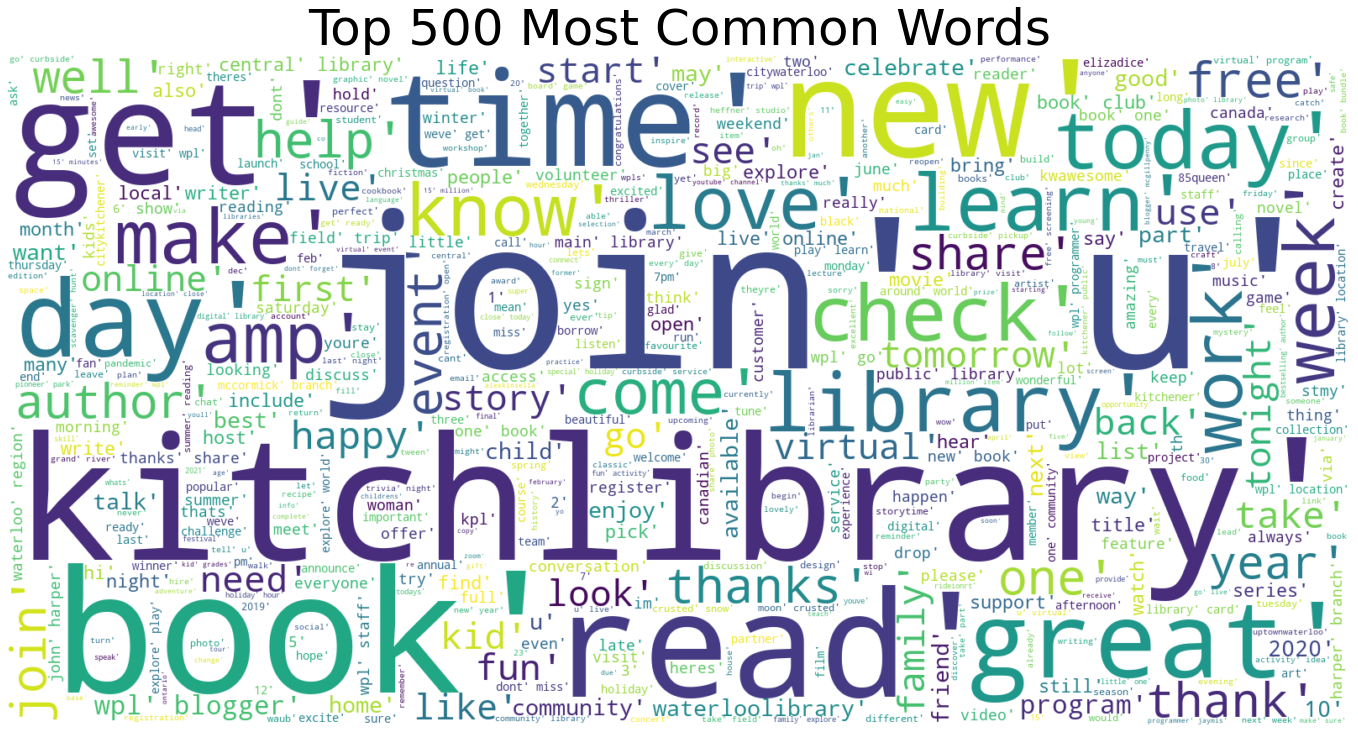

In [489]:
# Running this cell may take a few minutes
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Removing stop words
stop = set(stopwords.words('english'))
df['lemmatized_words_no_stop'] = df['lemmatized_words'].apply(lambda x: [word for word in x if word not in stop])

# adding all tokens to create a list of tokens
words = df['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist


# you can change the number of words you wan to be displayed
max_words=500
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))
fig = plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")

# See https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html to find more interpolation

plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()


# 4- Sentiment Analysis

## 4-1- Sentiment Analysis- Word Level

We can determine how many positive and negative words are being used in each tweet by comparing them to a predefined list of words.                             
This helps us in using external data to help build features.

We borrowed our list of pos/neg words from this study: 
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [490]:
pos_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()
pos_words[:10]
#pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [491]:
neg_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()
neg_words[:10]
#neg_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [492]:
len(neg_words)

4783

In [493]:
# defining a supporting fuction for counting the number of positive and negative words
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [494]:
# count the number of positive and negative words in each tweet
df['pos_count'] = df['lemmatized_text'].apply(count_words, words=pos_words)
df['neg_count'] = df['lemmatized_text'].apply(count_words, words=neg_words)

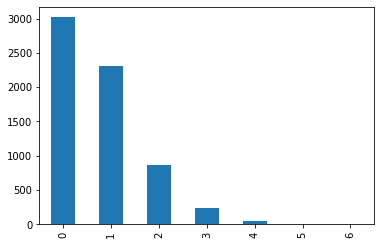

In [495]:
# Plotting the frequency of positive words in tweets
df['pos_count'].value_counts().plot.bar()

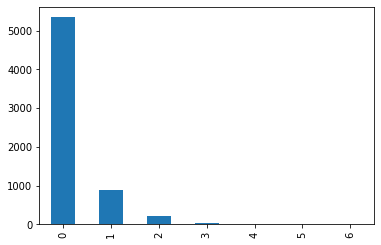

In [496]:
# Plotting the frequency of negative words in tweets
df['neg_count'].value_counts().plot.bar()

## 4-2- Sentiment analysis- Document Level


**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python library for processing textual data. It provides an API for di common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.


*   PatternAnalyzer - a default classifier that is built on the pattern library

    **Note: rules-based sentiment scores**

***Polarity*** is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

***Subjectivity*** is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual

*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus

NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg)

resource: https://textblob.readthedocs.io/en/dev/advanced_usage.html




In [497]:
from textblob import TextBlob
TextBlob('I love twitter').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [498]:
TextBlob('I do not love twitter').sentiment

Sentiment(polarity=-0.25, subjectivity=0.6)

In [499]:
TextBlob('I hate twitter').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [500]:
TextBlob('I do not hate twitter').sentiment

Sentiment(polarity=0.4, subjectivity=0.9)

In [501]:
# polarity and subjectivity can be seperated
print(TextBlob('I do not love twitter').sentiment.polarity)
print(TextBlob('I do not love twitter').sentiment.subjectivity)

-0.25
0.6


In [502]:
# Calculating polarity for tweets
df['sentiment_score']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

ID          created_at  ... neg_count sentiment_score
0  31035514 2021-03-16 23:00:00  ...         0        0.500000
1  31035514 2021-03-16 18:00:00  ...         1        0.000000
2  31035514 2021-03-16 17:00:01  ...         0        0.144444
3  31035514 2021-03-16 15:59:32  ...         0        0.400000
4  31035514 2021-03-16 15:57:42  ...         0        0.200000

[5 rows x 25 columns]

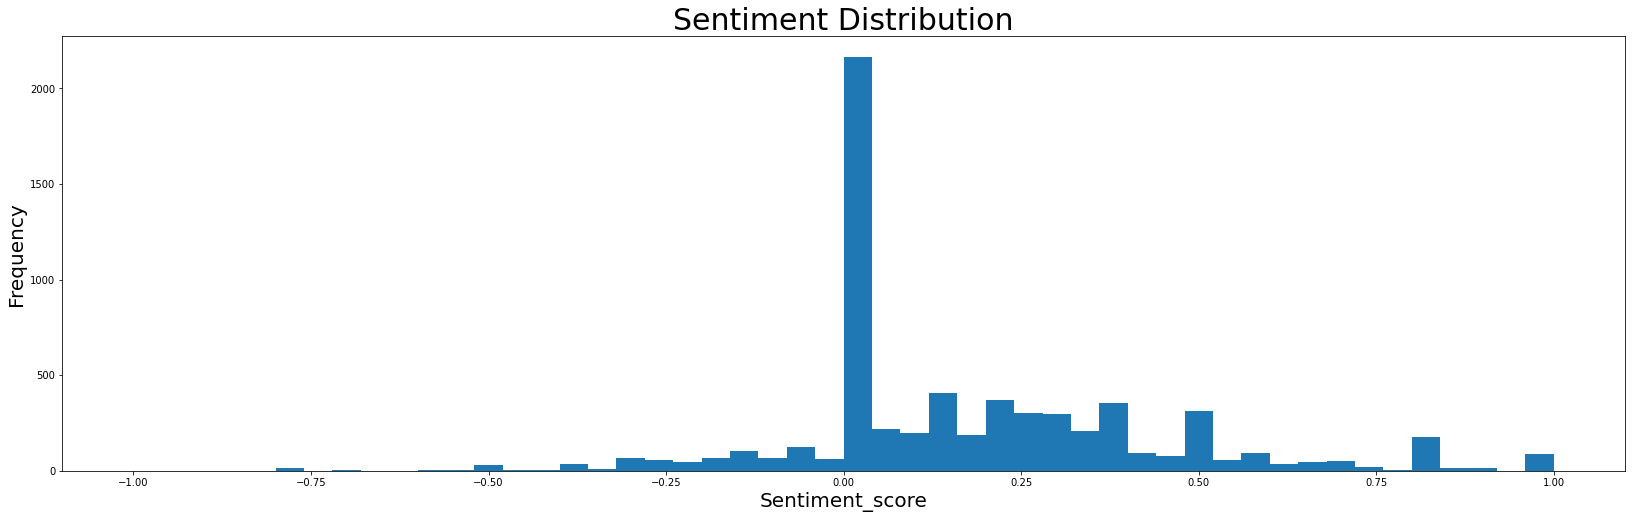

In [503]:
plt.figure(figsize=(28,8))
#plt.margins(0.02)
plt.xlabel('Sentiment_score', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment_score'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Let`s have a look at poitive tweets:

In [504]:
df[df['sentiment_score']>.7]['text'].iloc[2]

'One of the best (and very popular) book series to read while growing up is R.L. Stine’s Goosebumps. Each book featu… https://t.co/lHbKXPsuN6'

And negative tweets

In [505]:
df[df['sentiment_score']<-.7]['text'].iloc[12]

'Grief in the time of COVID-19 is uncharted territory for a lot of us. Join us for a virtual Understanding Grief ses… https://t.co/pIRw2liKWO'

### Most Frequent words with positive sentiment

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


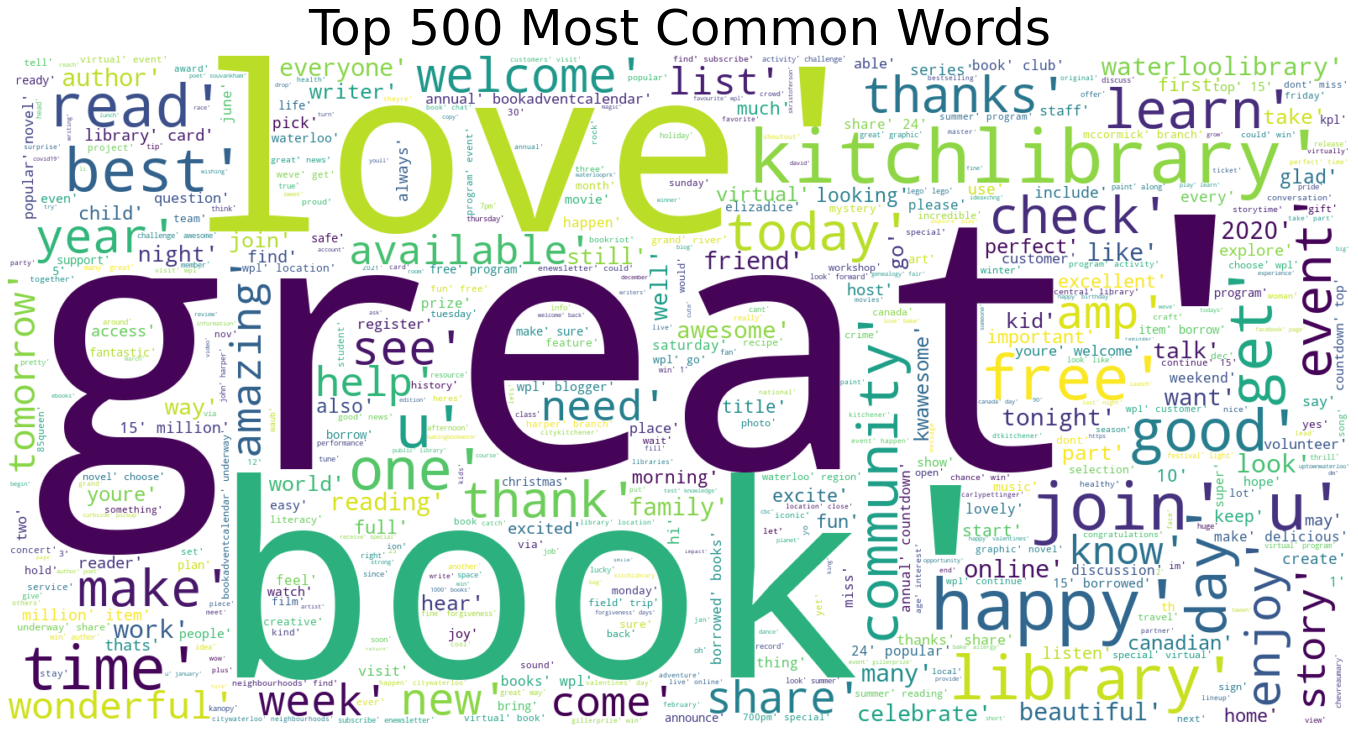

In [506]:
words = df[df['sentiment_score']>0.33]['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=500
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))




fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


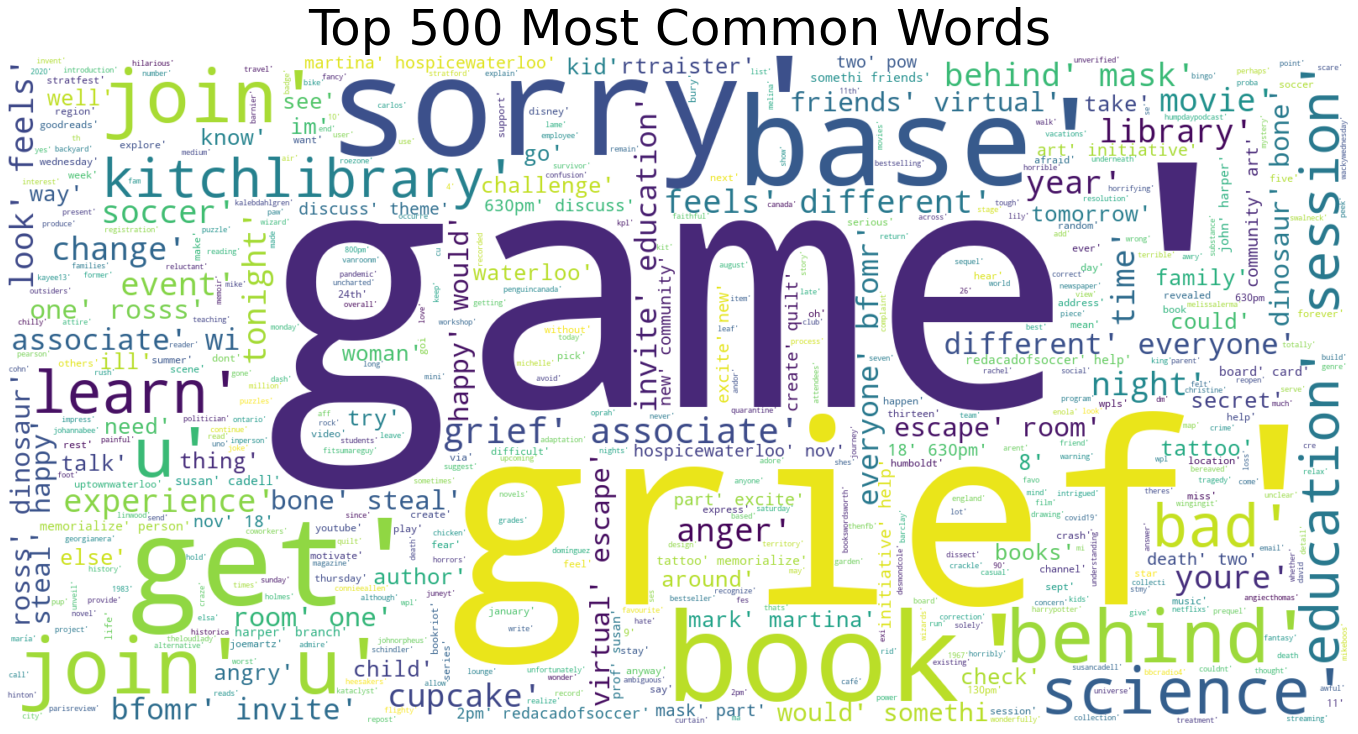

In [507]:
words = df[df['sentiment_score']<-0.33]['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=500
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))



fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Characteristics of positive and negative tweets 

In [508]:
positive_tweets= df[df['sentiment_score']>0.33]
print('The average of the number of words',positive_tweets['num_words'].mean())
print('The average of the number of chars',positive_tweets['num_chars'].mean())
print('The variance of the number of words',positive_tweets['num_words'].var())
print('The variance of the number of chars',positive_tweets['num_chars'].var())

The average of the number of words 18.806411837237977
The average of the number of chars 127.53699136868065
The variance of the number of words 23.552876814862863
The variance of the number of chars 684.6078226513787


In [509]:
negative_tweets=df[df['sentiment_score']<-0.33]
print('The average of the number of words',negative_tweets['num_words'].mean())
print('The average of the number of chars',negative_tweets['num_chars'].mean())
print('The variance of the number of words',negative_tweets['num_words'].var())
print('The variance of the number of chars',negative_tweets['num_chars'].var())

The average of the number of words 19.37037037037037
The average of the number of chars 128.42592592592592
The variance of the number of words 19.207338179300795
The variance of the number of chars 639.312218760817


# 5- Topic Modeling
**Topic Modeling:** Topic Modeling strives to automatically discovers the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


**Latent Semantic Analysis (LSA):** One of the oldest and most common techniques for topic modeling

**Latent Dirichlet Allocation (LDA):** Latent Dirichlet Allocation is an technique for topic modeling and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


In [510]:
# importing libraries
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Documents-Terms matrix**
Documents-Terms matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of document. it is used as an input for topic modeling techniqeus.

Types of Documents-Terms matrices:
*   Raw counts: CountVectorizer
*   Term Frequency–Inverse Document Frequency (TF-IDF) : is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus (TfidfVectorizer)

Example of documents- Terms matrix"

Document 1: I live in Waterloo. I work in Kitchener.

Document 2: I live in Kitchener. Kitchener is a good place to live.

Document 3: I am working on Topic Modeling in twitter.



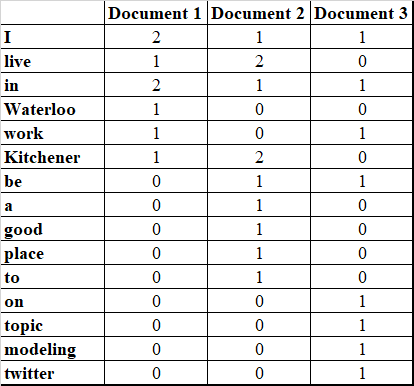




In [511]:
# Use CountVectorizor or TfidfVectorizer to find, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents

# Raw Counts
# vect = CountVectorizer(ngram_range=(1,2),
#                       min_df=20, 
#                       max_df=0.2, 
#                       stop_words='english', 
#                       )

# TF-IDF
vect=TfidfVectorizer(lowercase=True,
                     ngram_range=(1,2),
                     min_df=10,
                     max_df=0.2,
                     stop_words='english')
# Fit and transform
X = vect.fit_transform(df['lemmatized_text'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


## 5-1- Latent Semantic Analysis (LSA)
LSA also known as LSI (Latent Semantic Index) uses bag of word (BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by applying a matrix decomposition on the document-term matrix using Singular value decomposition.

In [512]:
from gensim.models.lsimodel import LsiModel
lsimodel=LsiModel(corpus, num_topics=3, id2word=id_map)
lsimodel.print_topics()

[(0,
  '0.360*"book" + 0.239*"library" + 0.201*"join" + 0.192*"kitchlibrary" + 0.192*"thanks" + 0.175*"new" + 0.157*"share" + 0.157*"read" + 0.145*"wpl" + 0.135*"day"'),
 (1,
  '-0.774*"thanks" + -0.379*"thanks share" + -0.371*"share" + 0.186*"book" + 0.075*"new" + 0.073*"read" + 0.062*"wpl" + 0.049*"live" + -0.048*"thanks come" + 0.047*"online"'),
 (2,
  '0.653*"book" + -0.408*"library" + 0.202*"read" + -0.136*"kitchlibrary" + -0.124*"central" + -0.117*"today" + -0.117*"central library" + -0.104*"thank" + -0.101*"free" + -0.093*"learn"')]

In [513]:
# calculating coherence score values for diffrent number of topics:
from gensim.models.coherencemodel import CoherenceModel
coherence_values = []
model_list = []
for num_topics in range (1,10):
  # generate LSA model
  model = LsiModel(corpus, num_topics=num_topics, id2word=id_map)
  model_list.append(model)
  coherencemodel= CoherenceModel(model=model, corpus=corpus, dictionary=id_map, coherence='u_mass')
  coherence_values.append(coherencemodel.get_coherence())

### Finding the optimum value for the best number of topics
topic coherence: 
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. 

plotting coherence score plot may take a few minutes. Please waite...


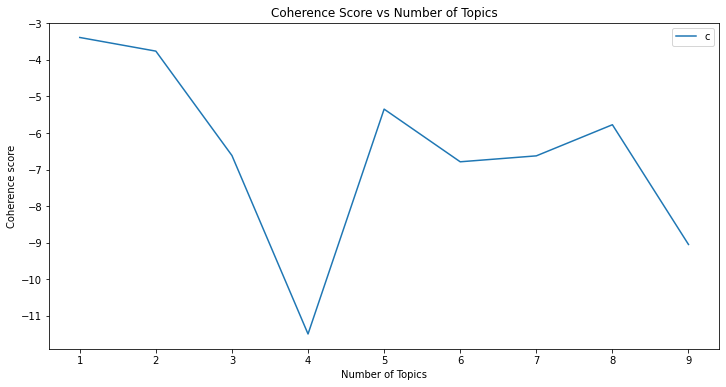

In [514]:
# Plotting coherence score values
print('plotting coherence score plot may take a few minutes. Please waite...')
fig = plt.figure(figsize=(12,6))
x= range (1,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title('Coherence Score vs Number of Topics')
plt.legend(("coherence_values"), loc='upper right')
plt.show()

In [515]:
lsimodel=LsiModel(corpus, num_topics=2, id2word=id_map)
lsimodel.print_topics()

[(0,
  '0.360*"book" + 0.239*"library" + 0.201*"join" + 0.192*"thanks" + 0.192*"kitchlibrary" + 0.175*"new" + 0.157*"read" + 0.156*"share" + 0.145*"wpl" + 0.135*"day"'),
 (1,
  '0.775*"thanks" + 0.376*"thanks share" + 0.372*"share" + -0.186*"book" + -0.075*"new" + -0.073*"read" + -0.063*"wpl" + 0.049*"thanks come" + -0.048*"live" + -0.046*"online"')]

## 5-2- Latent Dirichlet Allocation (LDA):

In [516]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()
#ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(0,
  '0.018*"join" + 0.008*"woman" + 0.008*"family" + 0.008*"fun" + 0.008*"day" + 0.008*"book" + 0.007*"learn" + 0.007*"today" + 0.007*"conversation" + 0.007*"online"'),
 (1,
  '0.019*"thank" + 0.014*"kitchlibrary" + 0.014*"library" + 0.010*"dont" + 0.010*"love" + 0.010*"belongtogetherwr" + 0.009*"central" + 0.009*"tonight" + 0.009*"people" + 0.009*"amp"'),
 (2,
  '0.021*"thanks" + 0.012*"book" + 0.012*"new" + 0.011*"kitchlibrary" + 0.010*"know" + 0.010*"good" + 0.009*"community" + 0.009*"library" + 0.009*"event" + 0.008*"check"')]

### LDA: Parameters Fine Tuning
Parameters that cane be modified:
*    The number of topics
*    The part of speech:

     *One popular way is to look only at terms that are from one part of speech (nouns, verbs,or adjectives). Then add more to find if meaningful topics appears.*
*    The number of passes:

      *Increasing the number of passess results in more robust words distributions.*

**LDA for noun words**

In [517]:
# creating a list of Nouns
df['nouns']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN'])
df['nouns']=[' '.join(map(str,i)) for i in df['nouns']]
df['nouns']

0                                 travel time bookriot
1                work suppression voting time thriller
2                                                 book
3                                             reminder
4       strength amp panel discussion screening docum…
                             ...                      
6487                                                pm
6488    HeffnerStudio construction learning temporary…
6489                                                  
6490                                          eye work
6491                                          question
Name: nouns, Length: 6492, dtype: object

In [518]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.065*"today" + 0.057*"event" + 0.042*"community" + 0.039*"week" + 0.036*"library" + 0.033*"amp" + 0.029*"fun" + 0.027*"year" + 0.027*"pm" + 0.023*"program"'),
 (1,
  '0.078*"book" + 0.064*"time" + 0.059*"day" + 0.039*"author" + 0.038*"tomorrow" + 0.037*"home" + 0.032*"night" + 0.032*"youre" + 0.031*"rtraister" + 0.025*"conversation"')]

In [519]:
# Number of topics =3
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.088*"today" + 0.077*"event" + 0.056*"community" + 0.048*"library" + 0.041*"fun" + 0.037*"year" + 0.036*"pm" + 0.032*"program" + 0.030*"share" + 0.026*"world"'),
 (1,
  '0.107*"book" + 0.088*"time" + 0.081*"day" + 0.059*"week" + 0.052*"tomorrow" + 0.044*"night" + 0.043*"youre" + 0.043*"rtraister" + 0.035*"conversation" + 0.032*"online"'),
 (2,
  '0.071*"author" + 0.066*"home" + 0.063*"amp" + 0.043*"work" + 0.040*"series" + 0.038*"family" + 0.035*"staff" + 0.033*"video" + 0.033*"elizadice" + 0.031*"support"')]

In [520]:
# Number of topics =4
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.115*"today" + 0.100*"event" + 0.073*"community" + 0.047*"pm" + 0.041*"program" + 0.039*"share" + 0.036*"fun" + 0.032*"way" + 0.031*"story" + 0.031*"tonight"'),
 (1,
  '0.144*"book" + 0.109*"day" + 0.079*"week" + 0.069*"tomorrow" + 0.058*"youre" + 0.047*"conversation" + 0.043*"online" + 0.043*"music" + 0.039*"list" + 0.033*"card"'),
 (2,
  '0.087*"library" + 0.084*"home" + 0.080*"amp" + 0.051*"series" + 0.048*"family" + 0.042*"video" + 0.038*"team" + 0.036*"workshop" + 0.035*"screening" + 0.035*"news"'),
 (3,
  '0.133*"time" + 0.081*"author" + 0.066*"night" + 0.065*"rtraister" + 0.060*"year" + 0.050*"work" + 0.043*"world" + 0.040*"staff" + 0.037*"elizadice" + 0.036*"support"')]

***LDA for Nouns and Adjectives***

In [521]:
# creating a list of Nouns
df['nouns_adjs']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN' or pos == 'JJ' ])

#for wordlist in words:
#    ' '.join(wordlist)
#len(wordlist)
df['nouns_adjs']=[' '.join(map(str,i)) for i in df['nouns_adjs']]
df['nouns_adjs']

0          many travel healthy postpandemic time bookriot
1             work voter suppression voting time thriller
2                             popular previous local book
3                                          Happy reminder
4       strength amp panel discussion free screening a...
                              ...                        
6487                                             other pm
6488    new HeffnerStudio construction learning tempor...
6489                                  steady new abnormal
6490                                             eye work
6491                                       great question
Name: nouns_adjs, Length: 6492, dtype: object

In [522]:
df['text'].iloc[3]

"RT @thenewquarterly: Happy International Women's Day ❤️\n\nThis is just a reminder that The X Page is accepting applications until March 25th…"

In [523]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.067*"library" + 0.042*"today" + 0.039*"free" + 0.037*"time" + 0.024*"week" + 0.022*"tomorrow" + 0.022*"home" + 0.019*"rtraister" + 0.019*"youre" + 0.018*"pm"'),
 (1,
  '0.057*"new" + 0.052*"book" + 0.044*"great" + 0.041*"event" + 0.039*"day" + 0.032*"amp" + 0.031*"virtual" + 0.030*"community" + 0.030*"good" + 0.027*"author"')]

In [524]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.060*"library" + 0.058*"time" + 0.050*"today" + 0.033*"home" + 0.030*"rtraister" + 0.029*"youre" + 0.023*"world" + 0.021*"amazing" + 0.021*"share" + 0.020*"series"'),
 (1,
  '0.084*"book" + 0.066*"event" + 0.050*"virtual" + 0.048*"community" + 0.043*"author" + 0.040*"fun" + 0.034*"night" + 0.033*"live" + 0.031*"pm" + 0.028*"good"'),
 (2,
  '0.075*"new" + 0.058*"free" + 0.052*"day" + 0.042*"amp" + 0.041*"library" + 0.041*"great" + 0.029*"happy" + 0.025*"year" + 0.023*"online" + 0.022*"program"')]

In [525]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.058*"time" + 0.057*"library" + 0.046*"today" + 0.034*"home" + 0.027*"youre" + 0.026*"rtraister" + 0.025*"world" + 0.021*"share" + 0.020*"series" + 0.020*"special"'),
 (1,
  '0.084*"book" + 0.063*"event" + 0.054*"virtual" + 0.046*"community" + 0.045*"author" + 0.042*"fun" + 0.035*"live" + 0.033*"night" + 0.030*"pm" + 0.028*"week"'),
 (2,
  '0.076*"new" + 0.056*"free" + 0.049*"day" + 0.040*"great" + 0.040*"amp" + 0.040*"library" + 0.029*"happy" + 0.027*"year" + 0.024*"online" + 0.023*"program"')]

In [526]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.065*"library" + 0.057*"time" + 0.039*"rtraister" + 0.038*"youre" + 0.031*"world" + 0.028*"amazing" + 0.028*"share" + 0.026*"series" + 0.024*"family" + 0.024*"elizadice"'),
 (1,
  '0.099*"book" + 0.077*"event" + 0.058*"virtual" + 0.057*"good" + 0.056*"week" + 0.056*"community" + 0.046*"home" + 0.040*"night" + 0.031*"fun" + 0.030*"music"'),
 (2,
  '0.082*"new" + 0.073*"day" + 0.059*"amp" + 0.057*"great" + 0.040*"happy" + 0.036*"year" + 0.035*"library" + 0.029*"work" + 0.027*"favourite" + 0.026*"available"'),
 (3,
  '0.096*"today" + 0.065*"free" + 0.055*"author" + 0.053*"online" + 0.051*"tomorrow" + 0.042*"live" + 0.041*"library" + 0.041*"pm" + 0.037*"open" + 0.034*"conversation"')]

In [527]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.063*"library" + 0.058*"time" + 0.036*"youre" + 0.034*"rtraister" + 0.033*"world" + 0.028*"share" + 0.027*"series" + 0.026*"family" + 0.026*"amazing" + 0.023*"way"'),
 (1,
  '0.101*"book" + 0.075*"event" + 0.065*"virtual" + 0.059*"week" + 0.055*"community" + 0.054*"good" + 0.048*"home" + 0.039*"night" + 0.036*"fun" + 0.028*"music"'),
 (2,
  '0.103*"new" + 0.067*"day" + 0.056*"great" + 0.055*"amp" + 0.040*"happy" + 0.037*"year" + 0.032*"library" + 0.027*"work" + 0.027*"available" + 0.026*"list"'),
 (3,
  '0.094*"today" + 0.063*"free" + 0.057*"online" + 0.056*"author" + 0.049*"tomorrow" + 0.044*"live" + 0.040*"library" + 0.038*"open" + 0.037*"pm" + 0.036*"program"')]

In [528]:
new_doc= ["Waterloo Public Library will have an event for kids. The event will start at 5 PM and close at 8 PM, tomorrow. It is free for Waterloo community."]
def topic_distribution():
    
    # Fit and transform
    xx = vect.transform(new_doc)
    
    # Convert sparse matrix to gensim corpus.
    x_corpus = gensim.matutils.Sparse2Corpus(xx, documents_columns=False)
    
    # Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
    id_map = dict((v, k) for k, v in vect.vocabulary_.items())

    #print()
    #print(ldamodel[x_corpus])
    
    return list(ldamodel[x_corpus])[0] 
topic_distribution()

[(0, 0.025439303), (1, 0.3249913), (2, 0.025306825), (3, 0.62426263)]